# Prerequisites 
* Files ../../datasets/V1LGN_spks_CQuinn_(pre/post/novel).feather -- can be generated using notebook (`preprocessing-notebooks/Explorating data + preprocessing .ipynb`)
* DI analysis on the dataset V1LP-- pre/post/novel 

In [1]:
import glob 
import sys 
import os 
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib
import pandas as pd 


sys.path.append('../notebooks/lasso-method/')
sys.path.append('../code/')
sys.path.append('./')
from utils import * 

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42


os.makedirs('output', exist_ok=True)

## V1LP

In [2]:
import pandas as pd 


pre, post, novel = ( pd.read_feather('../../datasets/V1LP_spks_CQuinn_pre.feather'), 
                   pd.read_feather('../../datasets/V1LP_spks_CQuinn_post.feather'),
                   pd.read_feather('../../datasets/V1LP_spks_CQuinn_novel.feather'),) 

In [3]:
pre_units, post_units, novel_units = pre['id'].unique(), post['id'].unique(), novel['id'].unique()
len(pre_units), len(post_units), len(novel_units)

(894, 619, 743)

In [4]:
pre_files = glob.glob('../../V1LP/output__stimuli_0/DI_values/V1LP_spks_CQuinn_pre/0/500_1500/lasso_0.5/*')
post_files = glob.glob('../../V1LP/output__stimuli_0/DI_values/V1LP_spks_CQuinn_post/0/500_1500/lasso_0.5/*')
novel_files = glob.glob('../../V1LP/output__stimuli_0/DI_values/V1LP_spks_CQuinn_novel/0/500_1500/lasso_0.5/*')

len(pre_files), len(post_files), len(novel_files)

(894, 619, 743)

## pre vs post 

Issues summary {'negative_di': 122, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 70, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 122, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 70, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 122, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 70, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 122, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
Issues summary {'negative_di': 70, 'n_areas': 0, 'zero_contrib': 0, 'low_firing_rates': 0}
pre 205 LP LP
pre 320 LP V1
pre 116 V1 LP
pre 509 V1 V1
post 99 LP LP
post 147 LP V1
post 53 V1 LP
post 260 V1 V1

From LP to LP

From LP to V1

From V1 to LP

From V1 to V1

From LP to LP

From LP to V1

From V1 to LP

From V1 to V1


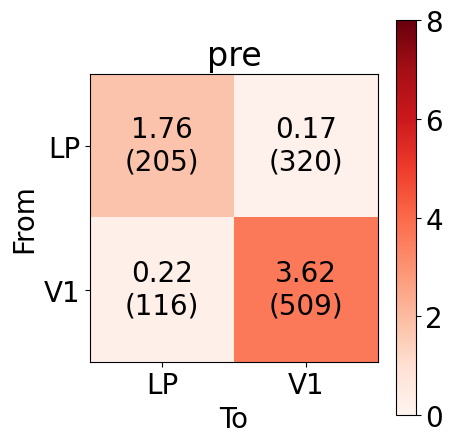

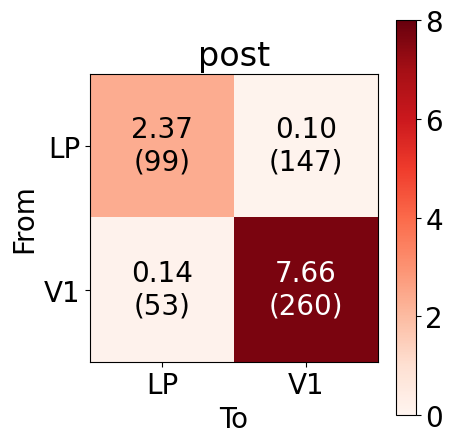

In [5]:
import analysis_utils
from all_stimuli_plots import read_plot_data

AREAS = ['LP', 'V1']
STIMULI = [0]
STIMULUS_ID = 0
data = read_plot_data('', pre_files,post_files, areas=AREAS, stimuli=STIMULI)

for pre_post in ['pre', 'post']:
    for a1 in AREAS:
        for a2 in AREAS:
            print(pre_post, len(data['raw'][a1][a2][pre_post][STIMULUS_ID]), a1, a2)
            
            
            
            

plot_per_training(data, 'pre', training='pre', areas=AREAS, stimulus_id=0)
plt.tight_layout()
plt.savefig('output/V1LP_pre.pdf', dpi=300)

plt.figure()

plot_per_training(data, 'post', training='post', areas=AREAS, stimulus_id=0)
plt.tight_layout()
plt.savefig('output/V1LP_post.pdf', dpi=300)



From LP to LP
true_diff  [[0.60131441]]
Proportion |Pre| / (|Pre| + |Post|) 0.6743421052631579
Using 1000000 runs
Significant - pre - 205, post - 99 with significance value 0.036475

From LP to V1
true_diff  [[-0.07594701]]
Proportion |Pre| / (|Pre| + |Post|) 0.6852248394004282
Using 1000000 runs
Significant - pre - 320, post - 147 with significance value 0.000462

From V1 to LP
true_diff  [[-0.08090199]]
Proportion |Pre| / (|Pre| + |Post|) 0.6863905325443787
Using 1000000 runs

From V1 to V1
true_diff  [[4.04601105]]
Proportion |Pre| / (|Pre| + |Post|) 0.6618985695708712
Using 1000000 runs
Significant - pre - 509, post - 260 with significance value 0.0
pvals [0.04863333 0.000924   0.057969   0.        ]


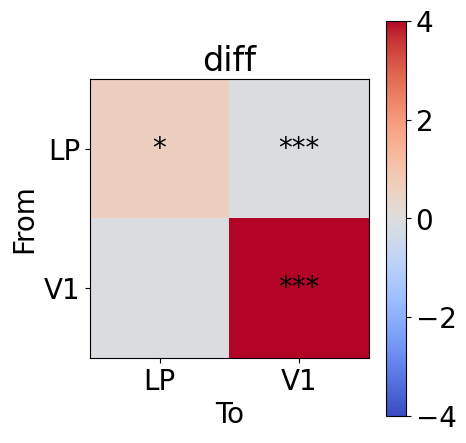

In [8]:

plot(data, 'diff', corrected=True, areas=AREAS, stimulus_id=0, max_=4., n_runs=10**6)

plt.tight_layout()
plt.savefig('output/V1LP_pre_post_diff.pdf', dpi=300)
